In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [31]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Task 1

**Basic Data Exploration:**

Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [33]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## Task 2

**Descriptive Statistics:**
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [34]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## Task 3

Data Cleaning: Handle missing data by suitable method with explain why you use it.


### solution:

From task 2, the number of data points we have equal to 148654.Then, we found the number of null values in our dataset.
1. The columns **Notes** and **status** have null values equal to 148654 which means they are empty and don't provide any information to the dataset. So, we can can drop those columns from the dataset.


                


In [35]:
df.drop(columns=["Notes","Status"],inplace=True)

2. The columns **OvertimePay** and **OtherPay** have only 4 null values and we have a large enough dataset. and from bellow, those rows of null values don't give much information. we can drop them.

In [36]:
small_null_values=df[df["OvertimePay"].isnull() | df["OtherPay"].isnull()]
small_null_values

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [37]:
df.dropna(subset=["OvertimePay","OtherPay"],inplace=True)

In [38]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

3. We have columns **BasePay** and **Benefits** have high number of null values but not as many that they don't give infomation at all. we can't drop them as it will effect the dataset and the results. we will fill those values using an imputer that uses the data from the column to fill them. There are many strategies to fill the null values using mean, mode or median. I will choose the mean.

In [23]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')

df["BasePay"]=imputer.fit_transform(df[["BasePay"]])
df["Benefits"]=imputer.fit_transform(df[["Benefits"]])

In [24]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## Task 4:

**Basic Data Visualization:** Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

Text(0, 0.5, 'Distribution of salaries')

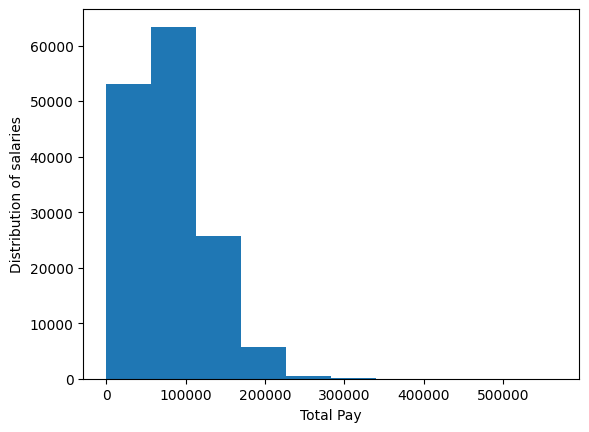

In [25]:
plt.hist(df["TotalPay"]);
plt.xlabel("Total Pay")
plt.ylabel("Distribution of salaries")

In [ ]:
df["JobTitle"].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [ ]:
df["JobTitle"].nunique()

2158

In [ ]:
jobs=df["JobTitle"].value_counts()
jobs

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

In [ ]:
jobs=pd.DataFrame({"Job Title":jobs.index,"Count":jobs.values})
jobs

,Job Title,Count
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421
...,...,...
2153,BUILDING SERVICES TECHNICIAN,1
2154,TRIAL DELAY REDUCTION COORDINATOR,1
2155,POWERHOUSE ELECTRICIAN SUPERVISOR II,1
2156,CHIEF NURSERY SPECIALIST,1


In [ ]:
mask = df['JobTitle'].str.contains('DEPARTMENT', case=False, na=False)

# Use the mask to filter rows and extract unique job titles
unique_departments = df.loc[mask, 'JobTitle'].unique()


In [ ]:
unique_departments

array(['CAPTAIN III (POLICE DEPARTMENT)',
       'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
       'BATTALION CHIEF, (FIRE DEPARTMENT)',
       'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'DEPARTMENT HEAD V', 'COMMANDER III, (POLICE DEPARTMENT)',
       'DEPUTY CHIEF III (POLICE DEPARTMENT)',
       'INSPECTOR III, (POLICE DEPARTMENT)',
       'LIEUTENANT III (POLICE DEPARTMENT)',
       'LIEUTENANT, FIRE DEPARTMENT', 'DEPARTMENT HEAD IV',
       'SERGEANT III (POLICE DEPARTMENT)',
       'SERGEANT I (POLICE DEPARTMENT)', 'DEPARTMENT HEAD III',
       'ASSISTANT INSPECTOR (POLICE DEPARTMENT)',
       'ASSISTANT INSPECTOR III (POLICE DEPARTMENT)',
       'SERGEANT II (POLICE DEPARTMENT)', 'DEPARTMENT HEAD I',
       'DEPARTMENT HEAD II', 'ASSISTANT INSPECTOR II (POLICE DEPARTMENT)',
       'INSPECTOR, (POLICE DEPARTMENT)',
       'LIEUTENANT I, (POLICE DEPARTMENT)',
       'LIEUTENANT II (POLICE DEPARTMENT)',
       'I

In [ ]:
mask_fire=df['JobTitle'].str.contains('FIRE')
mask_police = df['JobTitle'].str.contains('POLICE')
mask_med=df["JobTitle"].str.contains("MEDICAL")

df_fire=df[mask_fire]
df_police=df[mask_police]
df_med=df[mask_med]

In [ ]:
df_med

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
17,18,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,119397.26,18625.08,25007.893151,278569.21,278569.21,2011,San Francisco
19,20,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257510.59,880.16,16159.50,25007.893151,274550.25,274550.25,2011,San Francisco
20,21,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510.48,0.00,16679.79,25007.893151,274190.27,274190.27,2011,San Francisco
21,22,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510.44,377.21,15883.56,25007.893151,273771.21,273771.21,2011,San Francisco
36,37,SUSAN CURRIN,"ADMINISTRATOR, SFGH MEDICAL CENTER",245124.44,0.00,12000.00,25007.893151,257124.44,257124.44,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
35392,35393,KATANYA HENRY,MEDICAL EVALUATIONS ASSISTANT,0.00,0.00,952.23,25007.893151,952.23,952.23,2011,San Francisco
35597,35598,JOHN CORTEZ,MEDICAL SOCIAL WORKER,0.00,0.00,672.04,25007.893151,672.04,672.04,2011,San Francisco
35732,35733,NICOLE BARTOLINI,MEDICAL SOCIAL WORKER,516.40,0.00,20.66,25007.893151,537.06,537.06,2011,San Francisco
35764,35765,CRAIG STROOPE,MEDICAL EXAMINER'S INVESTIGATOR I,0.00,0.00,481.02,25007.893151,481.02,481.02,2011,San Francisco


In [ ]:
df_police

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,25007.893151,297608.92,297608.92,2011,San Francisco
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01,73478.20,13957.65,25007.893151,286213.86,286213.86,2011,San Francisco
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.00,11522.18,25007.893151,267992.59,267992.59,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
35131,35132,CYNTHIA HAYNES-EPPERSON,SENIOR POLICE COMMUNICATIONS DISPATCHER,1006.40,0.00,361.82,25007.893151,1368.22,1368.22,2011,San Francisco
35151,35152,LYNN BLOOM,POLICE SERVICES AIDE,0.00,0.00,1324.80,25007.893151,1324.80,1324.80,2011,San Francisco
35318,35319,ROBERT CHAPMAN,POLICE OFFICER III,0.00,0.00,1088.00,25007.893151,1088.00,1088.00,2011,San Francisco
35671,35672,RUSSELL MATLI,POLICE OFFICER III,0.00,0.00,597.31,25007.893151,597.31,597.31,2011,San Francisco


In [ ]:
df_fire

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,25007.893151,315981.05,315981.05,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25007.893151,303427.55,303427.55,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25007.893151,302377.73,302377.73,2011,San Francisco
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,25007.893151,299494.17,299494.17,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
34790,34791,CHARLES JOHNSON,FIREFIGHTER,0.00,0.00,1966.11,25007.893151,1966.11,1966.11,2011,San Francisco
34927,34928,THOMAS LEEPER,FIRE FIGHTER PARAMEDIC,0.00,11.21,1707.63,25007.893151,1718.84,1718.84,2011,San Francisco
35811,35812,ROBERTO LUCHA,FIREFIGHTER,0.00,217.10,185.07,25007.893151,402.17,402.17,2011,San Francisco
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0.00,0.00,92.21,25007.893151,92.21,92.21,2011,San Francisco


## Task 5 :

**Grouped Analysis:** Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [39]:
df["Agency"].unique()

array(['San Francisco'], dtype=object)

In [40]:
df["Year"].unique()

array([2011, 2012, 2013, 2014])

In [41]:
df["Year"].value_counts()

2014    38119
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [28]:
df["JobTitle"].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [29]:
df["JobTitle"].nunique()

2158

In [42]:
df["JobTitle"].value_counts()

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

In [55]:
jobs=df["JobTitle"].value_counts()
jobs.nlargest(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

### Group by year

In [79]:
group_year=df.groupby(["Year"])

In [80]:
agg_year = group_year.agg({'TotalPay': {'sum','mean'}, 'BasePay': {'sum','mean'}, 'OvertimePay': 'max'})

In [81]:
agg_year

TotalPay                     BasePay               OvertimePay
              mean           sum          mean           sum         max
Year                                                                    
2011  71744.103871  2.594195e+09  63595.956517  2.299566e+09   245131.88
2012  74113.262265  2.724848e+09  65436.406857  2.405835e+09   220909.48
2013  77611.443142  2.918656e+09  69630.030216  2.576381e+09   196689.18
2014  75471.836912  2.876911e+09  66564.421924  2.537369e+09   173547.73

### Group by Job titles

In [82]:
group_job=df.groupby(["JobTitle"])

In [83]:
agg_job = group_job.agg({'TotalPay': {'sum','mean'}, 'BasePay': {'sum','mean'}, 'OvertimePay': 'max'})

In [84]:
agg_job

TotalPay              \
                                                        mean         sum   
JobTitle                                                                   
ACCOUNT CLERK                                   44035.664337  3654960.14   
ACCOUNTANT                                      47429.268000   237146.34   
ACCOUNTANT INTERN                               29031.742917  1393523.66   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000    62290.78   
ACUPUNCTURIST                                   67594.400000    67594.40   
...                                                      ...         ...   
X-RAY LABORATORY AIDE                           52705.880385  1370352.89   
X-Ray Laboratory Aide                           50823.942700  5082394.27   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000    53632.87   
Youth Comm Advisor                              41414.307500   165657.23   
ZOO CURATOR                                     66686.560000    66686.56   

                                                     BasePay              \
                                                        mean         sum   
JobTitle                                                                   
ACCOUNT CLERK                                   43300.806506  3593966.94   
ACCOUNTANT                                      46643.172000   233215.86   
ACCOUNTANT INTERN                               28732.663958  1379167.87   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000    62290.78   
ACUPUNCTURIST                                   66374.400000    66374.40   
...                                                      ...         ...   
X-RAY LABORATORY AIDE                           47664.773077  1239284.10   
X-Ray Laboratory Aide                           46086.387100  4608638.71   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.910000    52609.91   
Youth Comm Advisor                              39077.957500   156311.83   
ZOO CURATOR                                     43148.000000    43148.00   

                                               OvertimePay  
                                                       max  
JobTitle                                                    
ACCOUNT CLERK                                     10753.06  
ACCOUNTANT                                            0.00  
ACCOUNTANT INTERN                                   624.84  
ACPO,JuvP, Juv Prob (SFERS)                           0.00  
ACUPUNCTURIST                                         0.00  
...                                                    ...  
X-RAY LABORATORY AIDE                             23016.22  
X-Ray Laboratory Aide                             29239.96  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS        0.00  
Youth Comm Advisor                                    0.00  
ZOO CURATOR                                           0.00  

[2158 rows x 5 columns]

In [85]:
group_year_job=df.groupby(["Year","JobTitle"])
agg_year_job = group_year_job.agg({'TotalPay': {'sum','mean'}, 'BasePay': {'sum','mean'}, 'OvertimePay': 'max'})

In [86]:
agg_year_job

TotalPay                   BasePay  \
                                              mean         sum          mean   
Year JobTitle                                                                  
2011 ACCOUNT CLERK                    44035.664337  3654960.14  43300.806506   
     ACCOUNTANT                       47429.268000   237146.34  46643.172000   
     ACCOUNTANT INTERN                29031.742917  1393523.66  28732.663958   
     ACUPUNCTURIST                    67594.400000    67594.40  66374.400000   
     ADMINISTRATIVE ANALYST           63954.867527  5947802.68  63435.628602   
...                                            ...         ...           ...   
2014 Wire Rope Cable Maint Sprv      190575.900000   190575.90  93904.720000   
     Worker's Comp Supervisor 1       56689.446667   340136.68  54505.333333   
     Worker's Compensation Adjuster   70636.455385  1836547.84  69915.985385   
     X-Ray Laboratory Aide            51211.566857  1792404.84  45490.340286   
     Youth Comm Advisor               36465.910000    36465.91  32417.420000   

                                                OvertimePay  
                                            sum         max  
Year JobTitle                                                
2011 ACCOUNT CLERK                   3593966.94    10753.06  
     ACCOUNTANT                       233215.86        0.00  
     ACCOUNTANT INTERN               1379167.87      624.84  
     ACUPUNCTURIST                     66374.40        0.00  
     ADMINISTRATIVE ANALYST          5899513.46        0.00  
...                                         ...         ...  
2014 Wire Rope Cable Maint Sprv        93904.72    79173.85  
     Worker's Comp Supervisor 1       327032.00        0.00  
     Worker's Compensation Adjuster  1817815.62        0.00  
     X-Ray Laboratory Aide           1592161.91    29239.96  
     Youth Comm Advisor                32417.42        0.00  

[4136 rows x 5 columns]

## Task 6

**Simple Correlation Analysis:** Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [67]:
import seaborn as sns
corr=df.select_dtypes("number").drop(columns='Id').corr()

In [68]:
corr

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751
OvertimePay,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887
OtherPay,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499
Benefits,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136
TotalPay,0.954494,0.504859,0.470496,0.884097,1.000000,0.977312,0.032145
TotalPayBenefits,0.946595,0.467981,0.422341,0.930140,0.977312,1.000000,0.152009
Year,0.033751,0.027887,-0.002499,-0.043136,0.032145,0.152009,1.000000


The correlation coeffiecnt had shown that there are a strong correlation between the Total pay and with the **Benefits**, **BasePay** and **TotalPayBenefits** columns.

<Axes: >

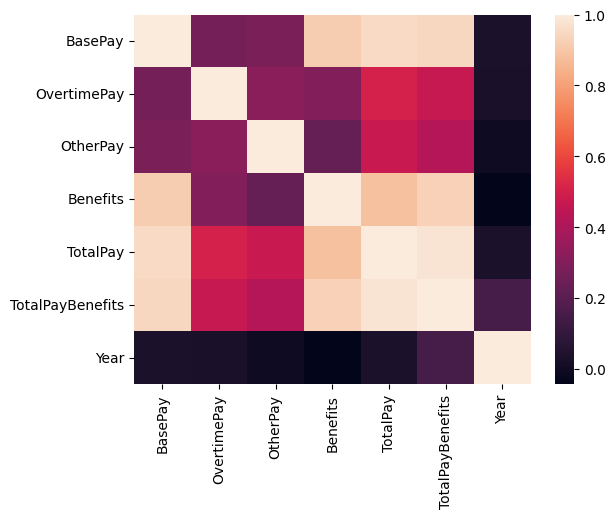

In [69]:
sns.heatmap(corr)

Text(0.5, 1.0, 'Relation between Base pay and Total pay')

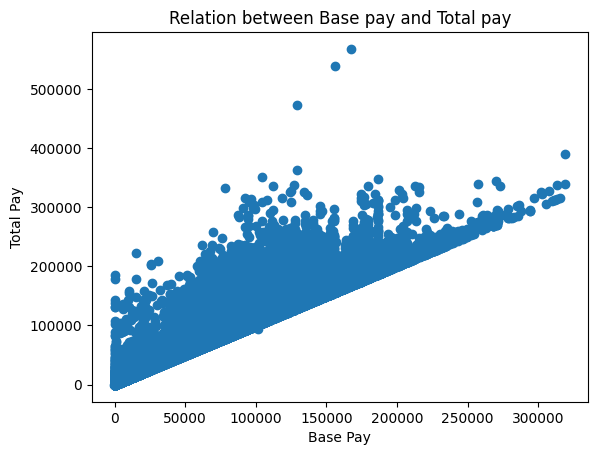

In [76]:
plt.scatter(df["BasePay"],df["TotalPay"])
plt.xlabel("Base Pay")
plt.ylabel("Total Pay")
plt.title("Relation between Base pay and Total pay")

Text(0.5, 1.0, 'Relation between Benefits and Total pay')

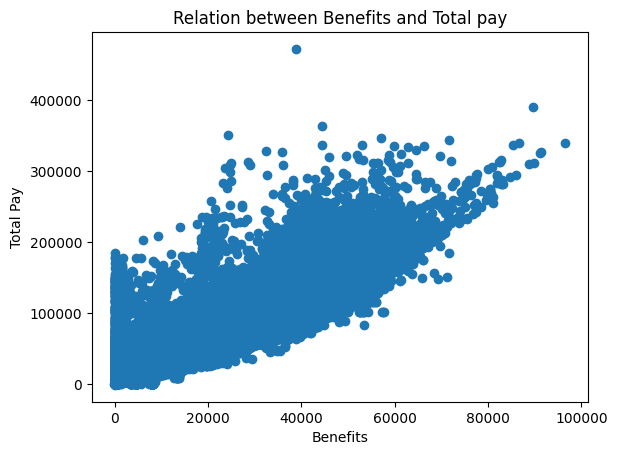

In [77]:
plt.scatter(df["Benefits"],df["TotalPay"])
plt.xlabel("Benefits")
plt.ylabel("Total Pay")
plt.title("Relation between Benefits and Total pay")

Text(0.5, 1.0, 'Relation between Total Pay Benefits and Total pay')

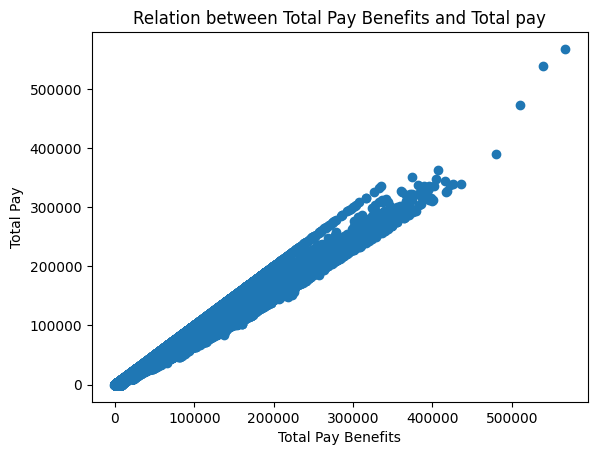

In [78]:
plt.scatter(df["TotalPayBenefits"],df["TotalPay"])
plt.xlabel("Total Pay Benefits")
plt.ylabel("Total Pay")
plt.title("Relation between Total Pay Benefits and Total pay")

## Task 7

**Summary of Insights:** Write a brief report summarizing the findings and insights from the analyses.


In this assignment:
 * I started with basic data exploration, identifying dimensions, data
types, and handling missing values.

* Descriptive statistics provided a snapshot of salary characteristics, including mean, median, and standard deviation.

* Data cleaning involved addressing missing values with a method justified for its appropriateness.

* Basic visualizations, such as histograms and pie charts, showcased salary distribution. Grouped analysis offered insights into salary variations across different categories such as the year and job titles.

* Lastly, a simple correlation analysis explored relationships between salary and other numerical variables, visualized through scatter plots. It had been shown that there are a strong correlation between the Total pay and with the **Benefits**, **BasePay** and **TotalPayBenefits** columns.